# Exploring Demographic and Billing Data for a Behavoiral Healthcare Provider

**By:** Scott Hongola

**Data:** Source data is from a client's billing data that has removed all protected patient health information using the "Safe Harbor" method - thus dates, insurance, and demographic information has been manipulated for privacy reasons.

**Keywords:**
- **In-Network (IN):** This means a service provider has a contracted rate with an insurance carrier
- **Out-Of-Network (OON):** This means a service provider does not have a contracted rate, the provider bills for a service rendered and the insurance carrier will pay them "Usual and Customary" for the service provided which changes based upon the carrier
- **Units Billed:** The number of units billed is a sum of total days of service billed on one insurance claim
- **Days Outstanding:** The number of days from the date billed to the date paid for a particular insurance claim
- **Month_DOS:** The month in which a date of service was rendered
- **Billed Amount:** The amount billed by the provider to insurance carriers for services rendered
- **Paid Amount:** The amount paid by insurance carriers to the provider for services rendered

This dataset provides **billing history** for a Behavioral Health Care provider specializing in **substance abuse treatment.** They offer both inpatient and outpatient care. The data provides limited patient demographics such as **age and gender** as well as **insurance provider, billed amount, paid amount, and the month the services were rendered.** The purpose of this exploratory analysis is to give the client feedback on basic demographic information as well as useful financial information to direct further marketing efforts and financial benchmarks.

## Data Analysis Questions
 - 1) What are the target demographics (age & gender) for individuals that seek treatment at this provider?
 - 2) How do different insurance carriers impact demographics and have demographics evolved over time as the business has matured?
 - 3) How has the program grown over time regarding number of services provided and revenue?

#### Importing Libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Reading the Data

In [23]:
# import dataframe and make a copy to work from
df = pd.read_csv("Billing_Data4.csv")
billing_data = df.copy()

### Exploratory Data Analysis

In [24]:
# explore panda dataframe types
billing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12225 entries, 0 to 12224
Data columns (total 23 columns):
MR_Num               12225 non-null object
Age_Admit            12225 non-null int64
Gender               12225 non-null object
IN/OON               12225 non-null object
Insurance_Main       12225 non-null object
Insurance_Sub        12225 non-null object
LOC                  12225 non-null object
Month_DOS            12225 non-null object
Units                12225 non-null int64
Billed_Amount        12225 non-null int64
Billed_Date          12225 non-null object
Days_Outstanding     11582 non-null float64
Allowed_Amt          12225 non-null float64
Paid_Amt             12225 non-null float64
Member_OOP           12225 non-null float64
Balance_Out          12225 non-null int64
Check_Date           11581 non-null object
Check_num            11575 non-null object
30_Days_Out          12225 non-null int64
60_Days_Out          12225 non-null int64
90_Days_Out          12225 non-nu

**Observations:**
 >- This dataframe has 12,225 Rows 
 >- 'Check Date', 'Days Outstanding', and 'Check Num' appear not to have values for certain rows. This is expected since this data is current and not all billing claims have been processed by carriers therefore those values would be empty until processed.
 >- Data types of certain columns are not appropriate (for example Billed Date, Month_DOS)

#### Fixing the data types (as observed in previous cell) and adding a column for Quarter of the year 

In [25]:
# change Date-Time dataframe objects to datetime in pandas
billing_data['Billed_Date'] = pd.to_datetime(billing_data['Billed_Date']).dt.floor('d')
billing_data['Check_Date'] = pd.to_datetime(billing_data['Check_Date']).dt.floor('d')
billing_data['Month_DOS'] = pd.to_datetime(billing_data['Month_DOS']).dt.floor('d')

# Add Quarter column for visualizations
billing_data['Quarter'] = pd.PeriodIndex(billing_data.Month_DOS, freq='Q')

In [26]:
# Explore dataset columns
billing_data.head()

,MR_Num,Age_Admit,Gender,IN/OON,Insurance_Main,Insurance_Sub,LOC,Month_DOS,Units,Billed_Amount,...,Member_OOP,Balance_Out,Check_Date,Check_num,30_Days_Out,60_Days_Out,90_Days_Out,120_Days_Out,Over_120_Days_Out,Quarter
0,MR100,50,Male,OON,DELTA HEALTH SYSTEMS,DELTA HEALTH SYSTEMS,DTX,2016-03-31,3,10485,...,0.0,0,2016-07-21,EFT 71980 DELTA,0,0,0,0,0,2016Q1
1,MR100,50,Male,OON,DELTA HEALTH SYSTEMS,DELTA HEALTH SYSTEMS,DTX,2016-03-31,2,6990,...,2236.8,0,2016-07-21,EFT 71980 DELTA,0,0,0,0,0,2016Q1
2,MR100,50,Male,OON,DELTA HEALTH SYSTEMS,DELTA HEALTH SYSTEMS,DTX,2016-03-31,2,6990,...,2236.8,0,2016-07-21,EFT 71980 DELTA,0,0,0,0,0,2016Q1
3,MR100,50,Male,OON,DELTA HEALTH SYSTEMS,DELTA HEALTH SYSTEMS,RTC,2016-03-31,2,6390,...,2044.8,0,2016-07-21,EFT 71980 DELTA,0,0,0,0,0,2016Q1
4,MR100,50,Male,OON,DELTA HEALTH SYSTEMS,DELTA HEALTH SYSTEMS,RTC,2016-03-31,3,9585,...,3067.2,0,2016-07-21,EFT 71980 DELTA,0,0,0,0,0,2016Q1


In [27]:
# Get basic statistics on data in the dataframe
billing_data.describe()

,Age_Admit,Units,Billed_Amount,Days_Outstanding,Allowed_Amt,Paid_Amt,Member_OOP,Balance_Out,30_Days_Out,60_Days_Out,90_Days_Out,120_Days_Out,Over_120_Days_Out
count,12225.000000,12225.000000,12225.000000,11582.000000,12225.000000,12225.000000,12225.000000,12225.000000,12225.000000,12225.000000,12225.000000,12225.000000,12225.000000
mean,38.439673,1.271002,1741.529652,31.116042,1057.475816,933.973404,124.120326,130.029448,7.064622,6.137832,0.932515,2.395092,113.499387
std,14.557910,1.175710,2120.341027,44.014320,1764.845402,1697.263149,394.999935,727.989705,266.204897,202.096995,54.530787,86.677426,641.643098
min,17.000000,1.000000,35.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,1.000000,760.000000,9.000000,300.000000,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,1.000000,1100.000000,20.000000,760.000000,750.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,2495.000000,33.000000,1100.000000,960.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,74.000000,31.000000,103695.000000,623.000000,103805.900000,103805.900000,11654.680000,24465.000000,24465.000000,11980.000000,4400.000000,4800.000000,15960.000000


#### Observations:
- The **mean Age** at time of Admit is **38** years old
- **75%** of the current **outstanding claims** are **less than 34 days** outstanding
- The **mean billed amount** per claim is \$1,742 and the **mean paid amount** is $934
- **Max Billed/Allowed/Paid** amount is \$103,806 which **is expected** from 1 large insurance claim bundled together

Since MR_Num is the unique identifier and has multiple rows in the data set it is important to determine how many unique ID's (patients) exist in the data

In [28]:
# Get number of unique ID's
print(billing_data['MR_Num'].nunique())

499


There are 499 (unique ID's) patients in the data set that have admitted to the program

In order to aggregate demographic information on unique patients we need to pivot the table by unique medical record numbers grouping by 'MR_Num' (Patients)

In [29]:
# Pivot the data, grouping by MR_Num (patient ID)
patients = pd.pivot_table(billing_data, index=['MR_Num'], aggfunc='first')

# Drop columns that are not relevant to exploring demographic data
patients.drop(patients.columns[[0, 1, 2, 3, 5, 6, 7, 8, 9]], inplace=True, axis=1)

In [30]:
# Explore unique patient data
patients.head()

,Age_Admit,Check_num,Days_Outstanding,Gender,IN/OON,Insurance_Main,Insurance_Sub,LOC,Member_OOP,Month_DOS,Over_120_Days_Out,Paid_Amt,Quarter,Units
MR_Num,,,,,,,,,,,,,,
MR100,50,EFT 71980 DELTA,128.0,Male,OON,DELTA HEALTH SYSTEMS,DELTA HEALTH SYSTEMS,DTX,0.0,2016-03-31,0,5032.8,2016Q1,3
MR101,23,EFT2500192459,6.0,Male,IN,KAISER PERMANENTE,KAISER PERMANENTE,RTC,0.0,2019-04-30,0,5320.0,2019Q2,7
MR102,50,Ck 256681,14.0,Male,IN,ADVANTEK,ADVANTEK,Detox,0.0,2019-08-31,0,0.0,2019Q3,3
MR103,21,EFT 201701251040047300 BS,161.0,Male,OON,BLUE CROSS,HORIZON BCBS OF NJ,RTC,0.0,2016-06-30,3195,0.0,2016Q2,1
MR104,58,NaN,NaN,Male,IN,BLUE CROSS,BCBS OF NY,RTC,0.0,2019-08-31,0,0.0,2019Q3,4


### 1) What are the target demographics (age & gender) for individuals that seek treatment at this provider?

#### Explore demographic information on age at time of admit

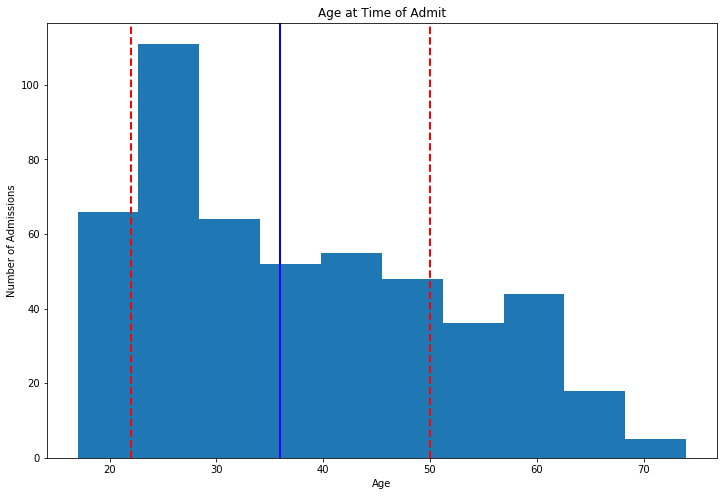

In [31]:
# Plot a distribution of age at time of admit
patients.Age_Admit.hist(figsize=(12,8), bins=10)
plt.axvline(patients.Age_Admit.median(), color='b', linestyle='solid', linewidth=2)
plt.axvline(patients.Age_Admit.median() + patients.Age_Admit.std(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(patients.Age_Admit.median() - patients.Age_Admit.std(), color='red', linestyle='dashed', linewidth=2)
plt.title('Age at Time of Admit')
plt.xlabel('Age')
plt.ylabel('Number of Admissions')
plt.grid(False)
plt.show()

In [32]:
print(patients.Age_Admit.median())

36.0


#### Observations:
- The **median age** at time of admit is **36** years old
- There is a **large grouping** of patients **between** the ages of **20 and 35**

#### Explore demographic information on Gender

In [33]:
# Group dataframe by unique MR_Num and gender
gender = billing_data.groupby('Gender')['MR_Num'].nunique()
print(gender)

Gender
Female    187
Male      312
Name: MR_Num, dtype: int64


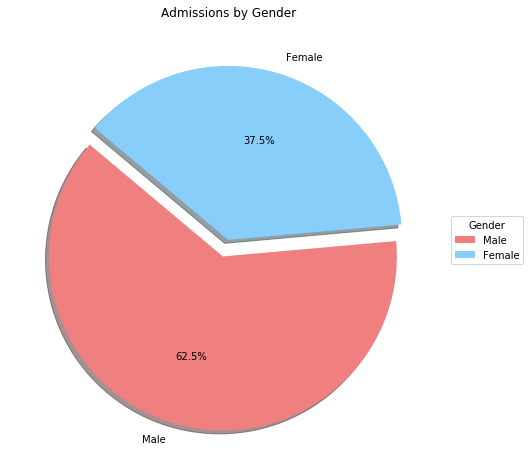

In [34]:
# Label gender information and set up Plot
labels = 'Male', 'Female'
sizes = [312, 187]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0) 

# Plot gender information
plt.figure(figsize=(12,8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels, title="Gender", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Admissions by Gender")
plt.show()

#### Key Takeaways:

- The **median age** of admit is **36** years old with a **large number of admissions** between the ages of **20-35**
- **63%** of admissions are **Male**
- Based upon this data it appears that the business should be **targeting Males aged 20-35** in the marketing efforts

### 2) How do different insurance carriers impact demographics and have demographics evolved over time as the business has matured?

#### Group the dataframe by unique patient ID and insurance carrier to get a count of the top insurance carriers by number of admissions

In [35]:
# Group data by unique ID and insurance carrier
Insurance = billing_data.groupby('Insurance_Main')['MR_Num'].nunique()
Insurance.nlargest(20)

Insurance_Main
BLUE CROSS                    186
KAISER PERMANENTE             120
BLUE SHIELD OF CA              24
AVANTE                         23
UBH                            23
COMMUNITY CARE HEALTH PLAN     15
HALCYON                        15
AETNA                          12
ADVANTEK                       11
CIGNA                          11
BEACON HEALTH OPTIONS           8
DEPARTMENT OF VA                6
TARP                            6
DELTA HEALTH SYSTEMS            5
HEALTH COMP                     4
WESTERN GROWERS                 4
MERITAIN HEALTH                 3
UMR                             3
CAPITOL ADMINISTRATOR           2
HEALTH NET                      2
Name: MR_Num, dtype: int64

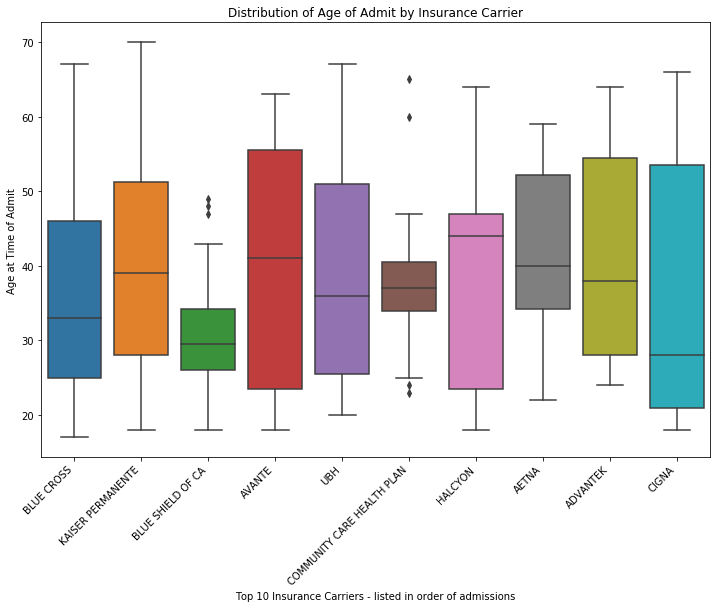

In [36]:
# Plot age at time of admit distribution of top 10 insurance carriers
plt.figure(figsize=(12,8))
age_dist = sns.boxplot(x='Insurance_Main', y='Age_Admit', data=patients, order=['BLUE CROSS','KAISER PERMANENTE',
                                                                       'BLUE SHIELD OF CA','AVANTE','UBH',
                                                                       'COMMUNITY CARE HEALTH PLAN','HALCYON',
                                                                       'AETNA','ADVANTEK','CIGNA'])
age_dist.set_xticklabels(age_dist.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Distribution of Age of Admit by Insurance Carrier')
plt.xlabel('Top 10 Insurance Carriers - listed in order of admissions')
plt.ylabel('Age at Time of Admit')
plt.show()

#### Observations:

- There appears to be a **slight difference** between **median age** of admit between the top two Insurance Carriers of **Blue Cross** and **Kaiser Permanente**
- **50% of Blue Cross** clients are **younger than 33 years** old
- **Kaiser Permanente** has a **uniform distribution of age** in their clients
- **50%** of **Cigna** client population is **younger than 27** years old

#### Examine gender of admissions by Insurance Carrier

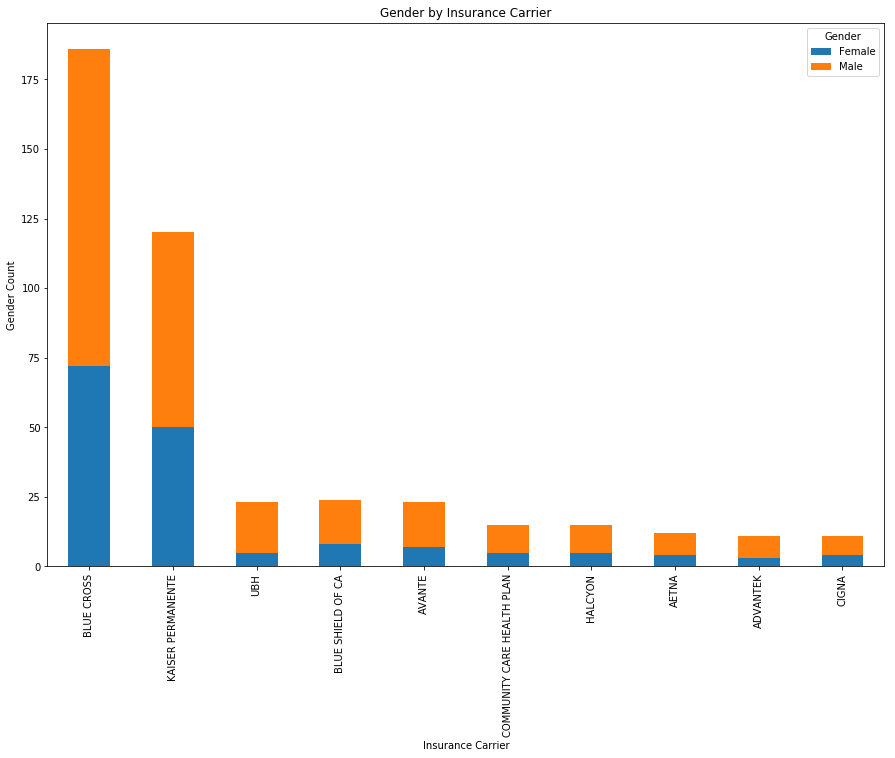

In [37]:
# Group by MR_Num, and Insurance to show Gender
gender_ins = billing_data.groupby(['Insurance_Main', 'Gender'])['MR_Num'].nunique().unstack('Gender').nlargest(10, ['Male','Female'])

# Plot bar graph of Gender by Insurance Carrier
gender_ins.plot(kind='bar', stacked=True, figsize=(15,10), sort_columns=True)
plt.title('Gender by Insurance Carrier')
plt.xlabel('Insurance Carrier')
plt.ylabel('Gender Count')
plt.show()

#### Observation:

- There is **not a significant difference** in **gender** of admissions from the **top insurance carriers**, however it is noteworthy how imporant Blue Cross and Kaiser Permanente are to the company is with a large number of admissions coming from both.

#### Look at median age at time of admit over time

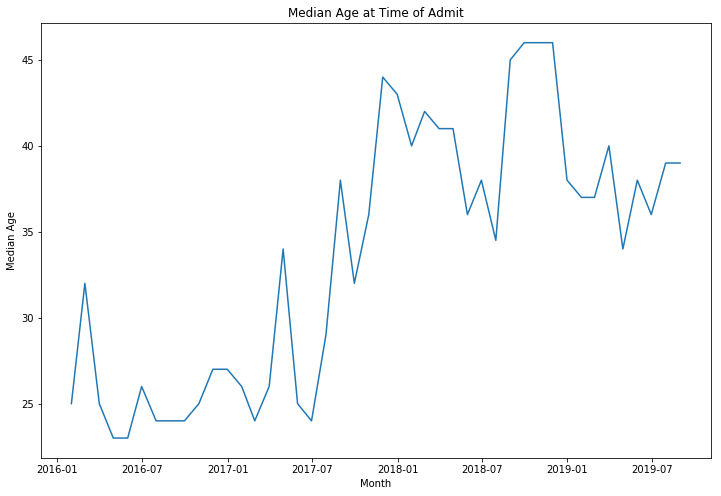

In [38]:
# Pivot data to index month in date of service and age of admit
age_admit = pd.pivot_table(data=billing_data, index='Month_DOS', values='Age_Admit', aggfunc='median')

# Plot median age of admit over time
plt.figure(figsize=(12,8))
plt.plot(age_admit)
plt.ylabel('Median Age')
plt.xlabel('Month')
plt.title('Median Age at Time of Admit')

plt.show()

#### Observations:

- **Significant increase** in **median age** of admit **over time** 
- There is a **large increase** in **median age** around **August 2017** which is significant because this is when the company went in-network with Blue Cross

#### Key Takeaways:
- There is a **slight difference** in **median age** of admit between the **top two insurance carriers (Blue Cross, Kaiser Permanente)**
- There is **not a significant diference in gender** of admission based upon **insurance carrier**
- We see a large **spike in median age of admit** around **August 2017.** This is significant because August 2017 is when the company went in-network with Blue Cross. That trend continued in 2018 and forward when the company went in-network with Kaiser Permanente and various other insurance carriers
- It is reasonable to say that **going in-network** is a contributing factor in shifting the **median age of admit by 10+ years**

### 3) How has the program grown over time regarding number of services provided and revenue?

#### Examine billed amount and paid amount over time

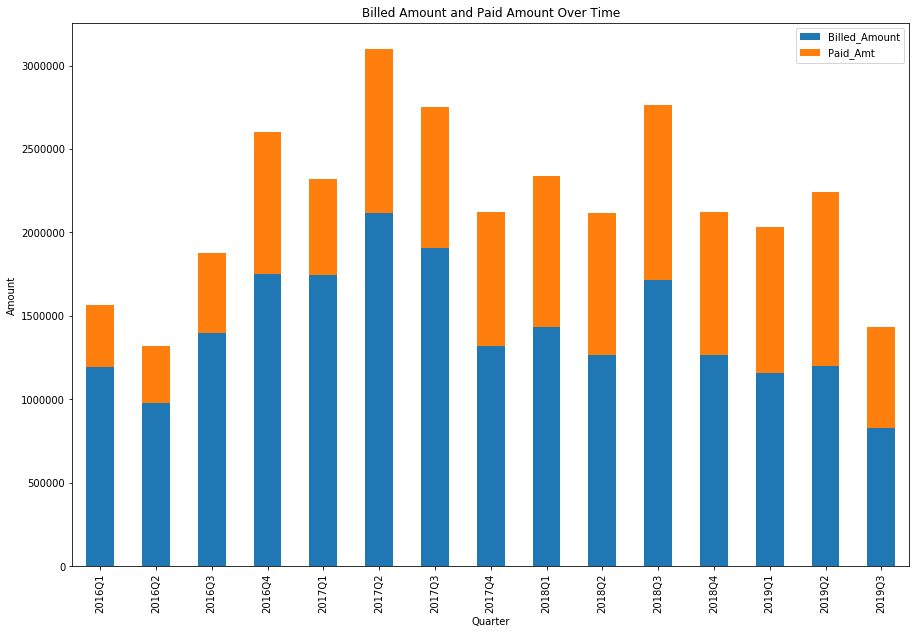

In [39]:
# Pivot dataframe by quarter to pull sum of billed amount and paid amount
billed_amt = pd.pivot_table(data=billing_data, index='Quarter', values=['Billed_Amount', 'Paid_Amt'], aggfunc='sum')

# Plot billed and paid amount
billed_amt.plot(kind='bar', stacked=True, figsize=(15,10))
plt.ylabel('Amount')
plt.xlabel('Quarter')
plt.title('Billed Amount and Paid Amount Over Time')
plt.show()

#### Observation:

- It **appears** that the company has **not grown significantly since 2016** based upon this chart of 'Billed Amount' and 'Paid Amount'. 'Paid Amount' is the main driver for revenue of the company.

#### Examine number of services provided over time

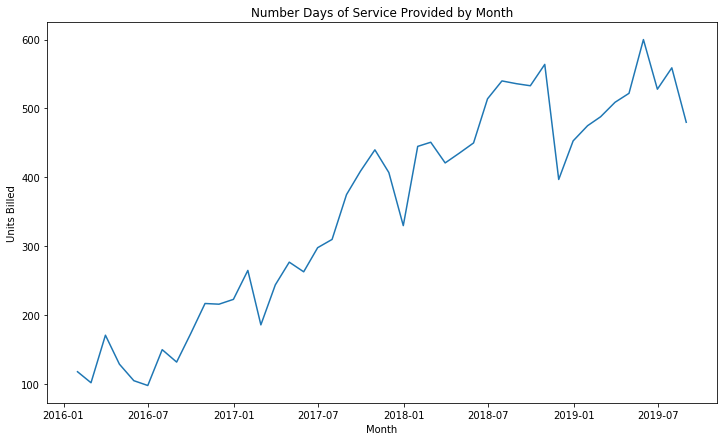

In [40]:
# get sum of units billed by month
units_by_month = billing_data.groupby(['Month_DOS'])['Units'].sum()

# Plot units billed by month
plt.figure(figsize=(12,7))
plt.plot(units_by_month)
plt.ylabel('Units Billed')
plt.xlabel('Month')
plt.title('Number Days of Service Provided by Month')
plt.show()

#### Observations:

- Contrary to the previous visualization the number of **days of service** has steadily **increased** over the **last 4 years**
- In **2019** the company is **averaging** providing around **500 days of service per month** compared to just **150 days** of service in **2016**

#### Examine how network status has impacted revenue and services provided over time to reconcile the information provided by previous 2 visualizations

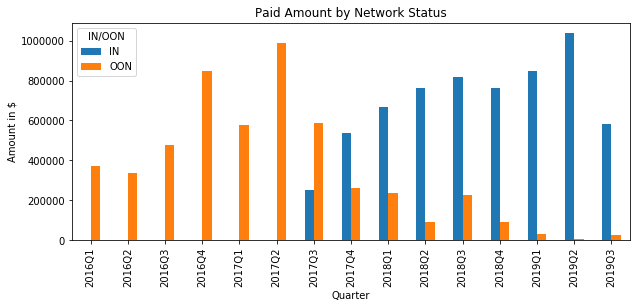

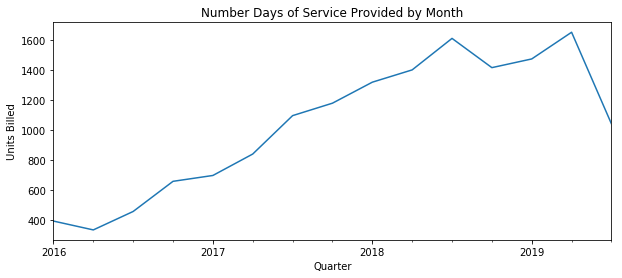

In [41]:
# Group dataframe by sum of Paid amount to plot paid amount over time by network status
paid_amount = billing_data.groupby(['Quarter', 'IN/OON'])['Paid_Amt'].sum().unstack('IN/OON')

# Group dataframe by sum of Units Billed to plot services provided amount over time
units_by_qtr = billing_data.groupby(['Quarter'])['Units'].sum()

# plot paid amount by network status over time
paid_amount.plot(kind='bar', figsize=(10,4))
plt.title('Paid Amount by Network Status')
plt.xlabel('Quarter')
plt.ylabel('Amount in $')
plt.show()

# plot units billed over time
units_by_qtr.plot(kind='line', figsize=(10,4))
plt.ylabel('Units Billed')
plt.xlabel('Quarter')
plt.title('Number Days of Service Provided by Month')
plt.show()

#### Observation:
- The impact of **going in-network** with various insurance carriers is noticable as the **number of services** provided has **increased significantly,** however **revenue** has only **advanced marginally**

#### Explore Paid amount per unit billed for In-Network versus Out-Of-Network

In [42]:
# Get average paid for unit billed for IN
paid_per_unit_IN = (billing_data.loc[billing_data['IN/OON'] == 'IN', 'Paid_Amt'].
                    sum())/ (billing_data.loc[billing_data['IN/OON'] == 'IN', 'Units'].sum())

# Get average paid for unit billed for OON
paid_per_unit_OON = (billing_data.loc[billing_data['IN/OON'] == 'OON', 'Paid_Amt'].
                    sum())/ (billing_data.loc[billing_data['IN/OON'] == 'OON', 'Units'].sum())

paid_diff = paid_per_unit_IN - paid_per_unit_OON

print(paid_per_unit_IN)
print(paid_per_unit_OON)
print(paid_diff)
print(1-(paid_per_unit_IN/paid_per_unit_OON))


611.0636039372381
975.497674815236
-364.4340708779979
0.37358784165941095


#### Key Takeaways:

- It appears that **going in-network** has **increased** the company's ability to provide more **services**
- The company provides **3 times** as many services **per month** in **2019** compared to **2016**
- The **amount paid per unit** of service billed is **\$364 or 37% less** for a unit billed **in-network versus out of network**

## Final Conclusions:
- The **median age** of admit is **36 years old** with a **large number of admits** in the **20-35** year old range
- **63%** of admissions are **male**
- **Median age** of admit **increased by** around **10+ years** at the time the company **went in-network** with multiple insurance carriers
- The company is **providing 3x** as many **services** to clients in **2019 versus 2016**, however **at a lower price** per service
- **Going in-network** with multiple insurance carriers has **expanded the company's reach** at the cost of **lower margins per unit** of service rendered

## Further Research:
- 1) Since going in-network has expanded the number of services provided we should look at what level of care those services are being provided at (inpatient or outpatient). It is possible that the reason for the lower amount paid for in-network per unit billed is a direct result of a lower billed charge for a lower level of care. Perhaps more services are being rendered that are less costly. We can do this by grouping the current data set by 'LOC' (Level of Care) and looking at the amount paid IN-network versus Out-Of-Network for each level of care.
<br>

- 2) An interesting perspective on in-network and out-of-network would be to examine how many days a claim is outstanding (unpaid) for in-network and out-of-network carriers. Additionally how the Days Sales Outstanding KPI has changed as the company has moved in-network. This can be calculated by agregatting the statistics for 'Days Outstanding' based upon both 'IN/OON' and "Insurance_Main' using the groupby method.
<br>

- 3) While we understand the demographics of individuals receiving treatment at this facility it would be important to get information on who is calling the facility initially, whether its the patient, a family member, etc to determine where marketing efforts should be directed.
<br>

- 4) Another interesting topic for further research would be to combine this billing data with other patient data from the Company's EMR to look at what substances younger versus older populations are seeking treatment for, are there other mental health issues that are common among certain substances being used, and likewise has going in-network impacted the type of substance use disorders being treated.